In [2]:
%matplotlib inline
# A linha acima é necessária para visualizar os gráficos no jupyter notebook

import os
import pandas as pd
# Módulo com funções matemáticas para arrays multidimensionais (matrizes)
import numpy as np
# Módulo com funções de geração de gráficos
import matplotlib.pyplot as plt

from numpy import arange

print('Esperamos trabalhar no diretório')
print(os.getcwd())

from sklearn.model_selection import train_test_split 
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_squared_error
import math
import seaborn as sns
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score 

Esperamos trabalhar no diretório
c:\Users\henri\OneDrive\Desktop\PYTHON\CDados\Trabalho 2\22-2a-cd-p2-grupo_henriques_e_lari


Primeiramente, importamos algumas bibliotecas para facilitar no processo do projeto. A primeira delas foi o "Pandas", uma biblioteca que nos permite manipular dataframes e informações. Importamos também o "Numpy", biblioteca com funções matemáticas para arrays multidimensionais, e o "MatPlotLib", biblioteca que permite a geração de gráficos. Além disso, importamos varias funções do "Sklearn", uma biblioteca que facilita o desenvolvimento de códigos relacionados a Machine Learning em Python. A primeira função que importamos foi a "tree", uma função que por si só faz uma árvore de decisão classificadora quando se passam os parâmetros necessários, facilitando muito o processo. Outra função que utilizamos foi a "metrics", uma função que implementa diversas formas de medições e classificações quanto a performance da nossa árvore de decisões. fornece várias funções para validação do nosso modelo. Por fim, mas não menos importante, utilizamos o "math" para realizar operações matemáticas e o "seaborn" para criarmos o gráfico de barras que indica a importância de cada feature para a qualidade do vinho.

<h1> Início </h1>

1) Para iniciar no projeto, importamos o arquivo de excel e fizemos uma limpeza dos dados

In [3]:
# Carregando os dados
vinho = pd.read_excel('WineQT.xlsx')
vinho.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,74,7,0,19,76,110,340,9978,351,56,94,5
1,78,88,0,26,98,250,670,9968,32,68,98,5
2,78,76,4,23,92,150,540,997,326,65,98,5
3,112,28,56,19,75,170,600,998,316,58,98,6
4,74,7,0,19,76,110,340,9978,351,56,94,5


In [4]:
vinho.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,74,7,0,19,76,110,340,9978,351,56,94,5
1,78,88,0,26,98,250,670,9968,32,68,98,5
2,78,76,4,23,92,150,540,997,326,65,98,5
3,112,28,56,19,75,170,600,998,316,58,98,6
4,74,7,0,19,76,110,340,9978,351,56,94,5


2) Após realizar a limpeza, decidimos criar um scatterplot para analisarmos as relações entre as nossas variáveis e o valor da qualidade do vinho.

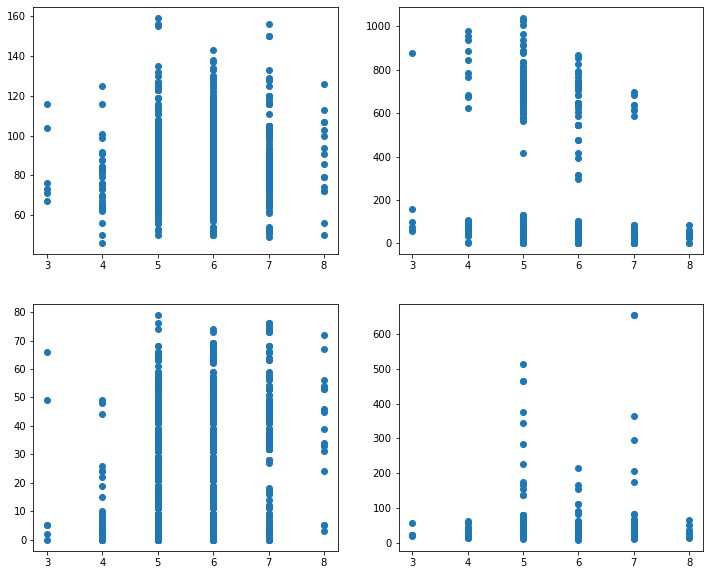

In [5]:
plt.figure(figsize=(12,10))
plt.subplot(2,2,1)
plt.scatter(vinho["quality"], vinho["fixed acidity"])
plt.subplot(2,2,2)
plt.scatter(vinho["quality"], vinho["volatile acidity"])
plt.subplot(2,2,3)
plt.scatter(vinho["quality"], vinho["citric acid"])
plt.subplot(2,2,4)
plt.scatter(vinho["quality"], vinho["residual sugar"])

3) Tentamos utilizar o scatterplot para analisar as variáveis sem separá-las e percebemos que não foi eficaz. Assim, decidimos fazer uma análise por histogramas.
Para isso, foi necessário separar os dados do gráfico, criando uma tabela separada para cada valor de qualidade do vinho.

In [6]:
vinho_3 = vinho.loc[vinho["quality"] == 3, :]

In [7]:
vinho_4 = vinho.loc[vinho["quality"] == 4, :]

In [8]:
vinho_5 = vinho.loc[vinho["quality"] == 5, :]

In [9]:
vinho_6 = vinho.loc[vinho["quality"] == 6, :]

In [10]:
vinho_7 = vinho.loc[vinho["quality"] == 7, :]

In [11]:
vinho_8 = vinho.loc[vinho["quality"] == 8, :]

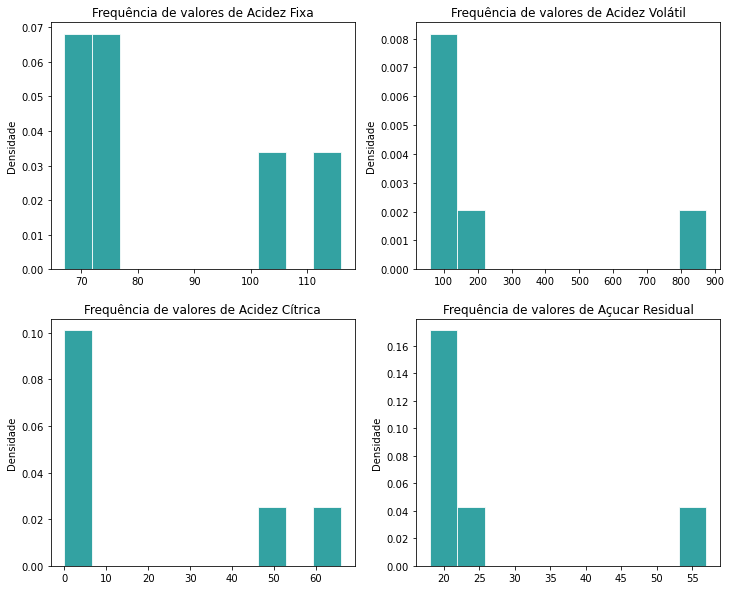

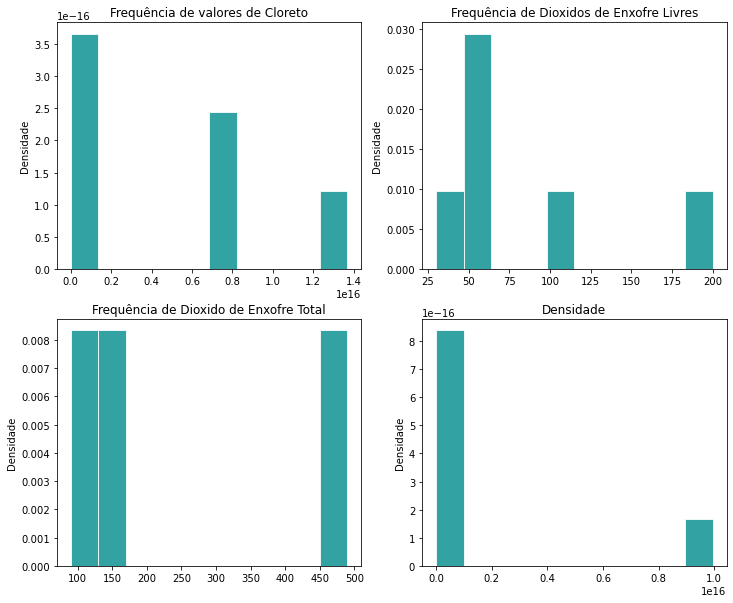

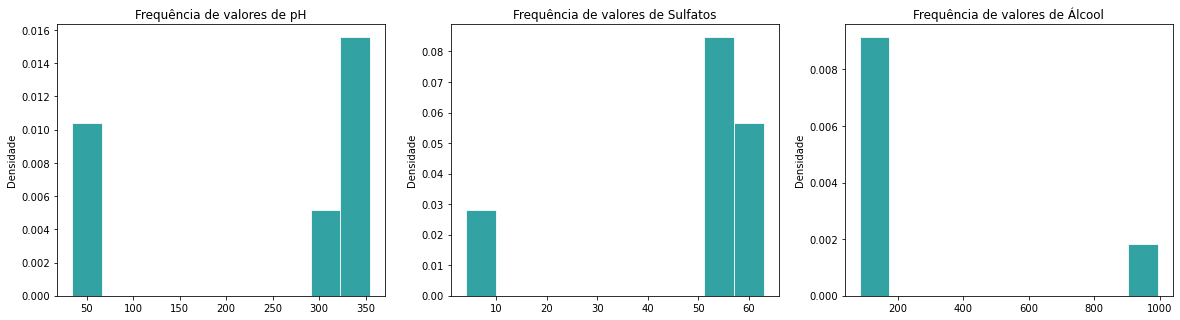

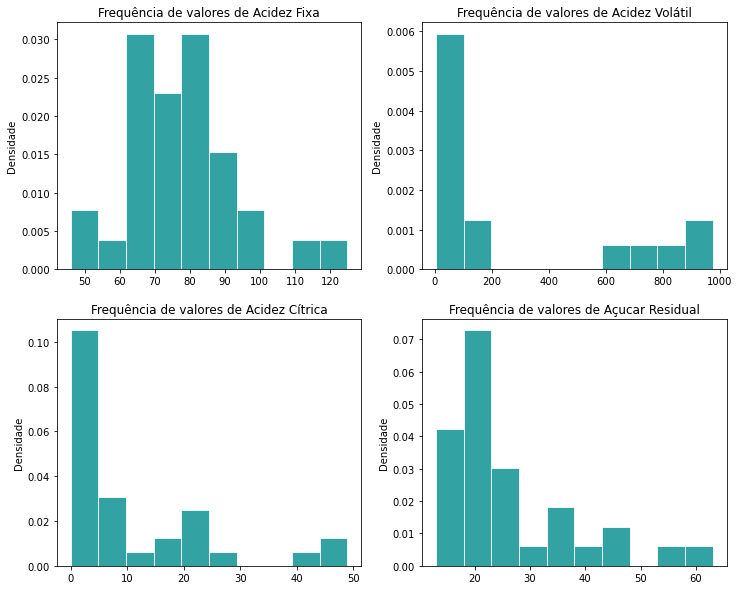

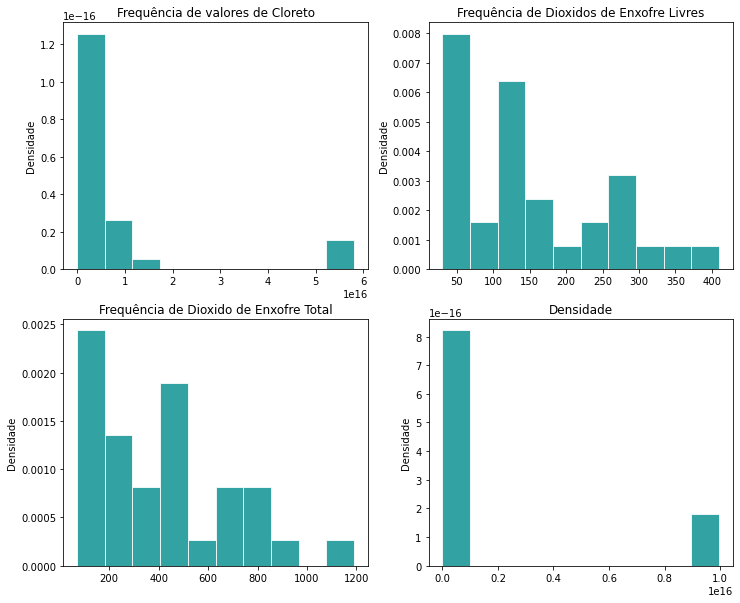

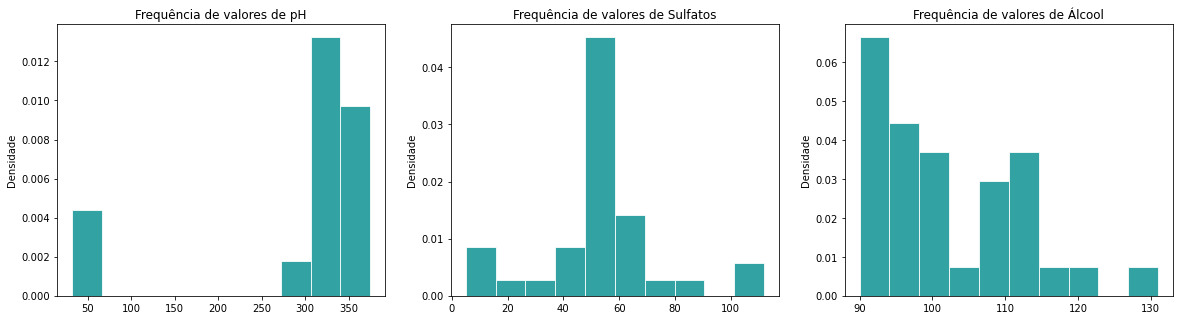

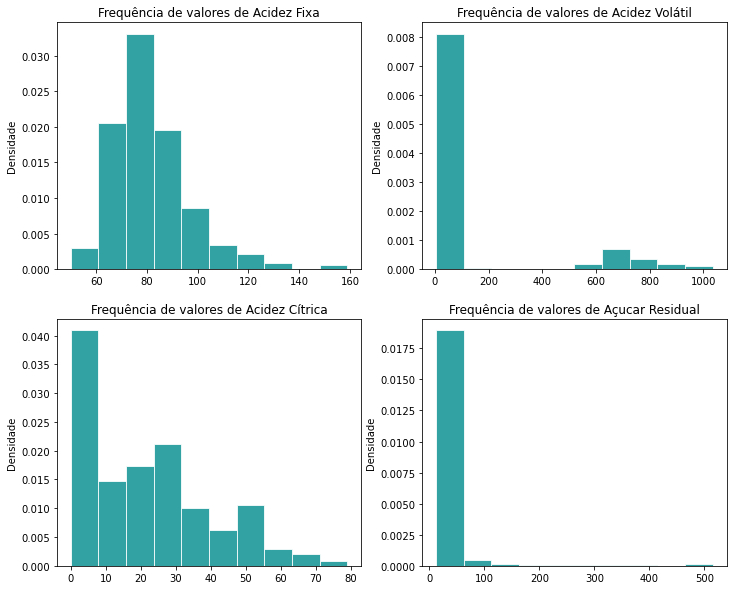

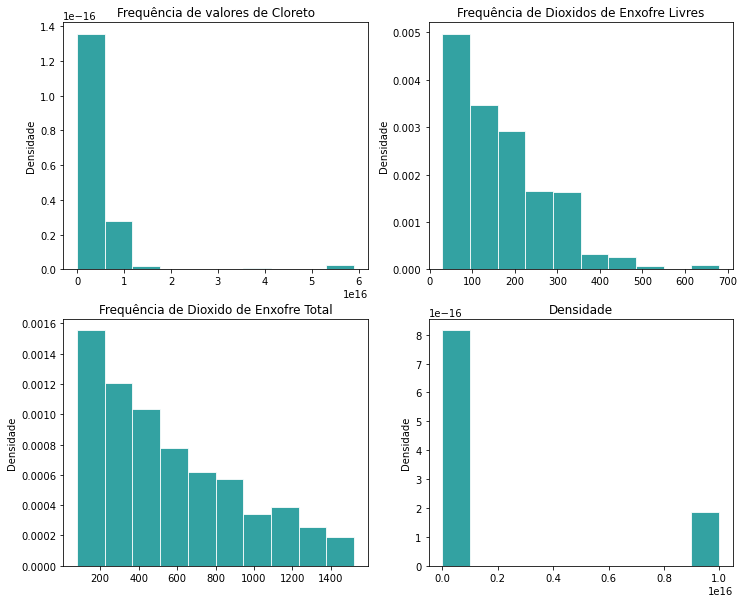

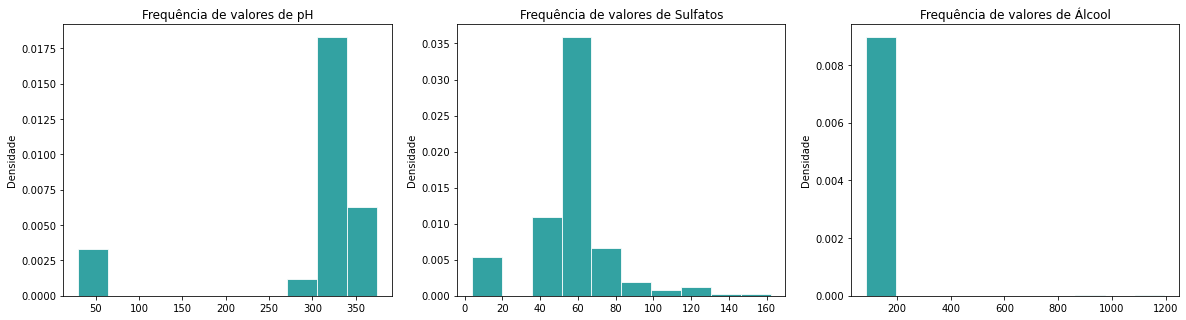

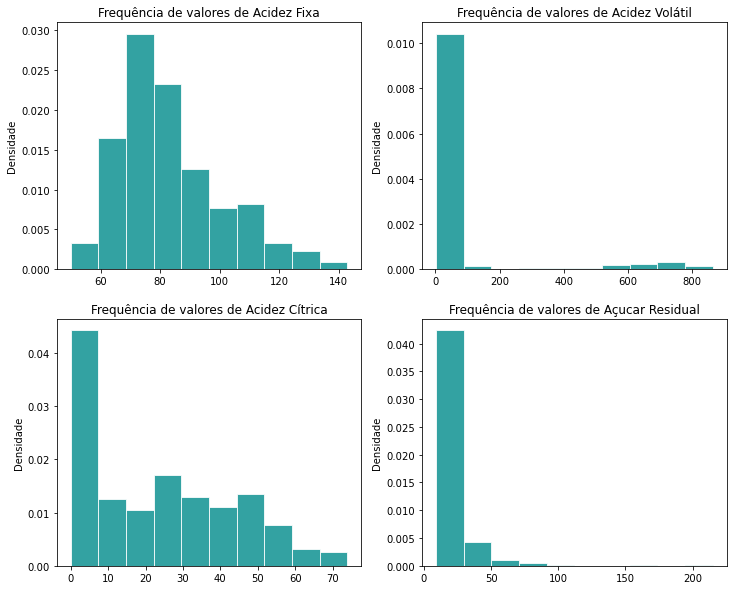

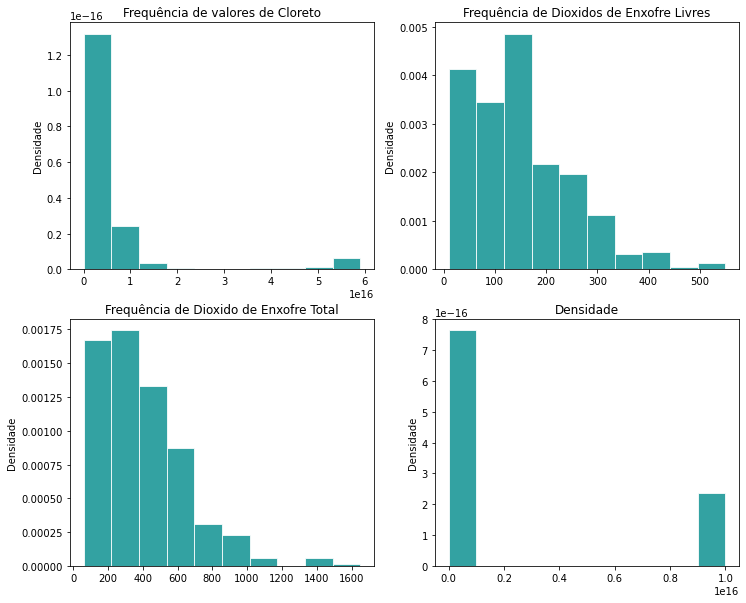

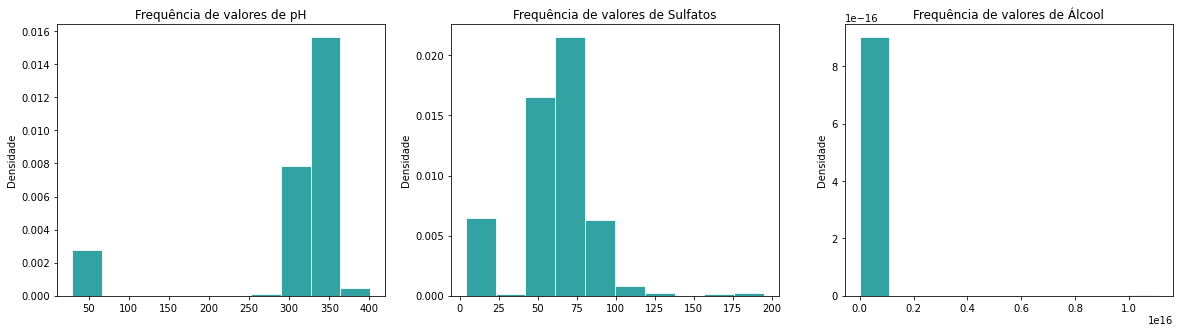

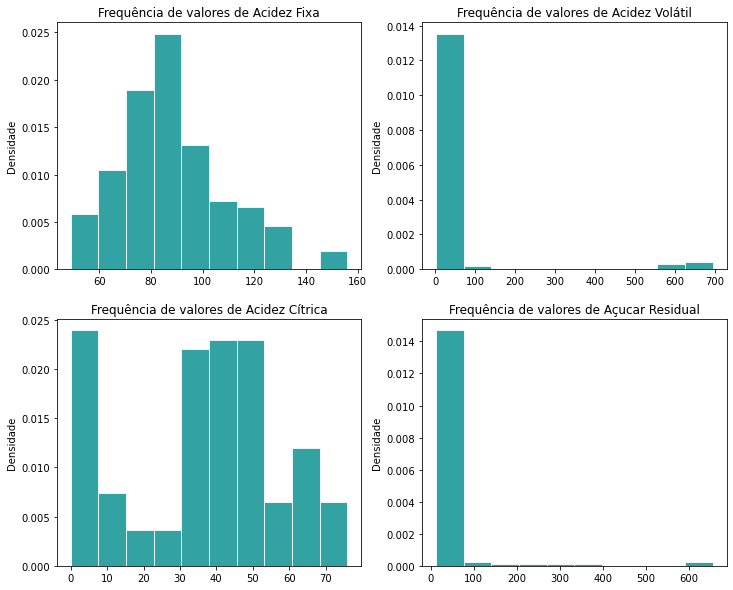

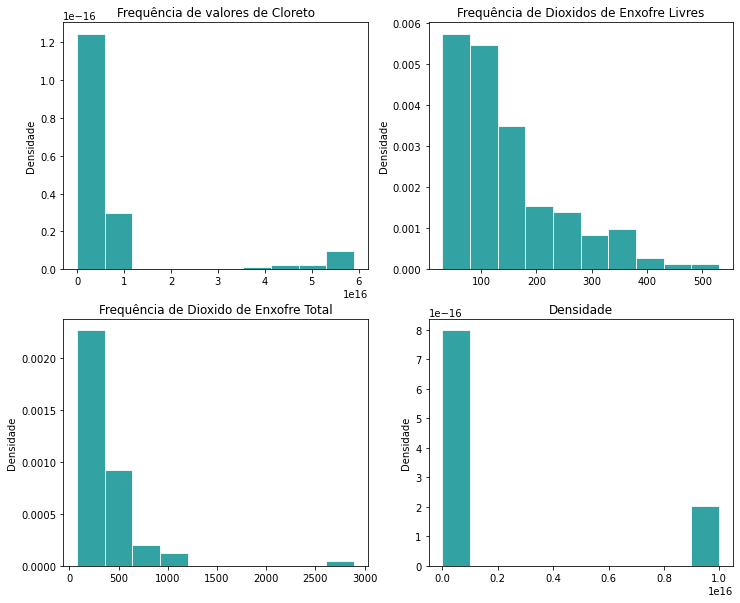

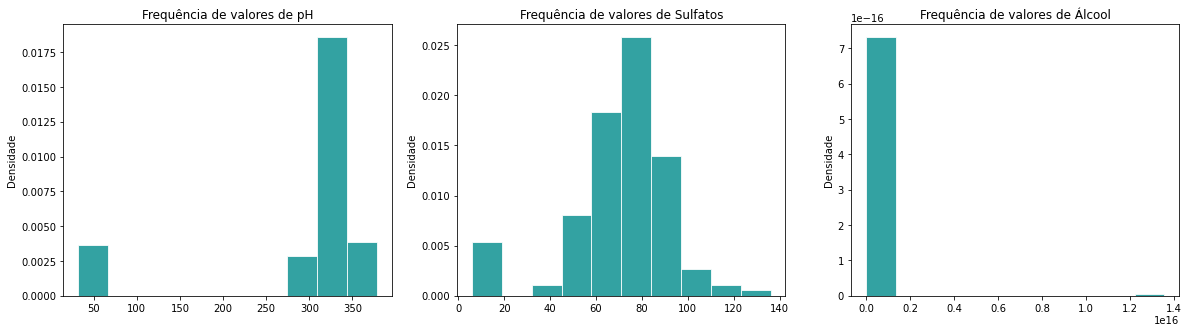

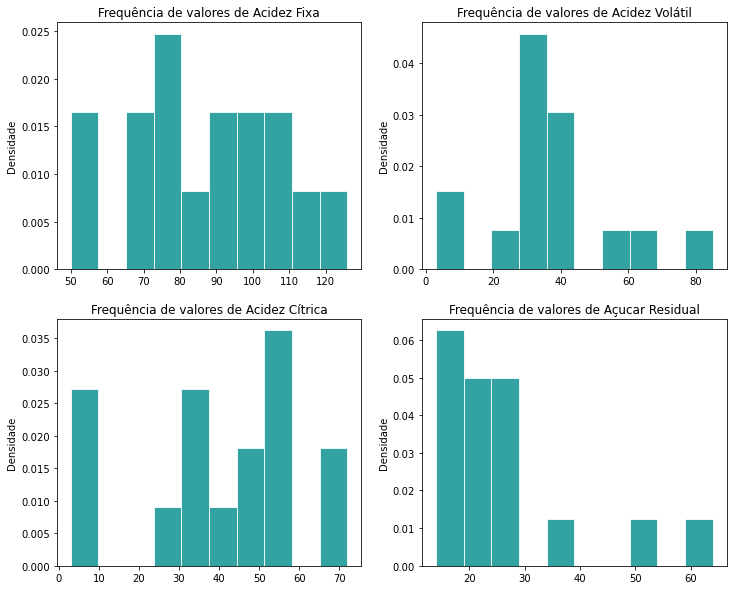

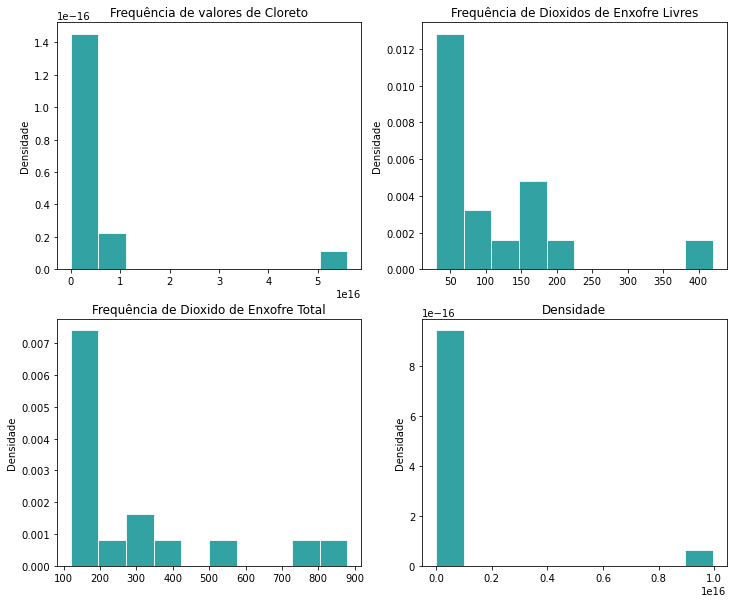

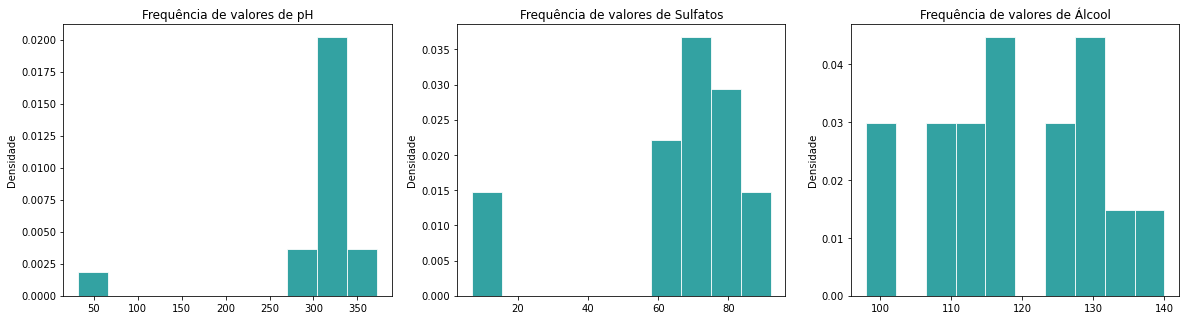

In [24]:
#4 Histogramas iniciais para qualidade do vinho = 3

plt.figure(figsize=(12,10))

plt.subplot(221)
plt.hist(vinho_3["fixed acidity"], density=True, color='darkcyan', edgecolor='white', linewidth=1, alpha=0.8)
plt.title('Frequência de valores de Acidez Fixa')
plt.ylabel('Densidade')
plt.ylim=(0,0.2)

plt.subplot(222)
plt.hist(vinho_3["volatile acidity"], density=True, color='darkcyan', edgecolor='white', linewidth=1, alpha=0.8)
plt.title('Frequência de valores de Acidez Volátil')
plt.ylabel('Densidade')
plt.ylim=(0,0.2)

plt.subplot(223)
plt.hist(vinho_3["citric acid"], density=True, color='darkcyan', edgecolor='white', linewidth=1, alpha=0.8)
plt.title('Frequência de valores de Acidez Cítrica')
plt.ylabel('Densidade')
plt.ylim=(0,0.2)

plt.subplot(224)
plt.hist(vinho_3["residual sugar"], density=True, color='darkcyan', edgecolor='white', linewidth=1, alpha=0.8)
plt.title('Frequência de valores de Açucar Residual')
plt.ylabel('Densidade')
plt.ylim=(0,0.2)

plt.show()

#4 Histogramas intermediários para qualidade do vinho = 3

plt.figure(figsize=(12,10))

plt.subplot(221)
plt.hist(vinho_3["chlorides"], density=True, color='darkcyan', edgecolor='white', linewidth=1, alpha=0.8)
plt.title('Frequência de valores de Cloreto')
plt.ylabel('Densidade')
plt.ylim=(0,0.2)

plt.subplot(222)
plt.hist(vinho_3["free sulfur dioxide"], density=True, color='darkcyan', edgecolor='white', linewidth=1, alpha=0.8)
plt.title('Frequência de Dioxidos de Enxofre Livres')
plt.ylabel('Densidade')
plt.ylim=(0,0.2)

plt.subplot(223)
plt.hist(vinho_3["total sulfur dioxide"], density=True, color='darkcyan', edgecolor='white', linewidth=1, alpha=0.8)
plt.title('Frequência de Dioxido de Enxofre Total')
plt.ylabel('Densidade')
plt.ylim=(0,0.2)

plt.subplot(224)
plt.hist(vinho_3["density"], density=True, color='darkcyan', edgecolor='white', linewidth=1, alpha=0.8)
plt.title('Densidade')
plt.ylabel('Densidade')
plt.ylim=(0,0.2)

plt.show()

#4 Histogramas finais para qualidade do vinho = 3

plt.figure(figsize=(20,5))

plt.subplot(131)
plt.hist(vinho_3["pH"], density=True, color='darkcyan', edgecolor='white', linewidth=1, alpha=0.8)
plt.title('Frequência de valores de pH')
plt.ylabel('Densidade')
plt.ylim=(0,0.2)

plt.subplot(132)
plt.hist(vinho_3["sulphates"], density=True, color='darkcyan', edgecolor='white', linewidth=1, alpha=0.8)
plt.title('Frequência de valores de Sulfatos')
plt.ylabel('Densidade')
plt.ylim=(0,0.2)

plt.subplot(133)
plt.hist(vinho_3["alcohol"], density=True, color='darkcyan', edgecolor='white', linewidth=1, alpha=0.8)
plt.title('Frequência de valores de Álcool')
plt.ylabel('Densidade')
plt.ylim=(0,0.2)

plt.show()

#4 Histogramas iniciais para qualidade do vinho = 4

plt.figure(figsize=(12,10))

plt.subplot(221)
plt.hist(vinho_4["fixed acidity"], density=True, color='darkcyan', edgecolor='white', linewidth=1, alpha=0.8)
plt.title('Frequência de valores de Acidez Fixa')
plt.ylabel('Densidade')
plt.ylim=(0,0.2)

plt.subplot(222)
plt.hist(vinho_4["volatile acidity"], density=True, color='darkcyan', edgecolor='white', linewidth=1, alpha=0.8)
plt.title('Frequência de valores de Acidez Volátil')
plt.ylabel('Densidade')
plt.ylim=(0,0.2)

plt.subplot(223)
plt.hist(vinho_4["citric acid"], density=True, color='darkcyan', edgecolor='white', linewidth=1, alpha=0.8)
plt.title('Frequência de valores de Acidez Cítrica')
plt.ylabel('Densidade')
plt.ylim=(0,0.2)

plt.subplot(224)
plt.hist(vinho_4["residual sugar"], density=True, color='darkcyan', edgecolor='white', linewidth=1, alpha=0.8)
plt.title('Frequência de valores de Açucar Residual')
plt.ylabel('Densidade')
plt.ylim=(0,0.2)

plt.show()

#4 Histogramas intermediários para qualidade do vinho = 4

plt.figure(figsize=(12,10))

plt.subplot(221)
plt.hist(vinho_4["chlorides"], density=True, color='darkcyan', edgecolor='white', linewidth=1, alpha=0.8)
plt.title('Frequência de valores de Cloreto')
plt.ylabel('Densidade')
plt.ylim=(0,0.2)

plt.subplot(222)
plt.hist(vinho_4["free sulfur dioxide"], density=True, color='darkcyan', edgecolor='white', linewidth=1, alpha=0.8)
plt.title('Frequência de Dioxidos de Enxofre Livres')
plt.ylabel('Densidade')
plt.ylim=(0,0.2)

plt.subplot(223)
plt.hist(vinho_4["total sulfur dioxide"], density=True, color='darkcyan', edgecolor='white', linewidth=1, alpha=0.8)
plt.title('Frequência de Dioxido de Enxofre Total')
plt.ylabel('Densidade')
plt.ylim=(0,0.2)

plt.subplot(224)
plt.hist(vinho_4["density"], density=True, color='darkcyan', edgecolor='white', linewidth=1, alpha=0.8)
plt.title('Densidade')
plt.ylabel('Densidade')
plt.ylim=(0,0.2)

plt.show()

#4 Histogramas finais para qualidade do vinho = 4

plt.figure(figsize=(20,5))

plt.subplot(131)
plt.hist(vinho_4["pH"], density=True, color='darkcyan', edgecolor='white', linewidth=1, alpha=0.8)
plt.title('Frequência de valores de pH')
plt.ylabel('Densidade')
plt.ylim=(0,0.2)

plt.subplot(132)
plt.hist(vinho_4["sulphates"], density=True, color='darkcyan', edgecolor='white', linewidth=1, alpha=0.8)
plt.title('Frequência de valores de Sulfatos')
plt.ylabel('Densidade')
plt.ylim=(0,0.2)

plt.subplot(133)
plt.hist(vinho_4["alcohol"], density=True, color='darkcyan', edgecolor='white', linewidth=1, alpha=0.8)
plt.title('Frequência de valores de Álcool')
plt.ylabel('Densidade')
plt.ylim=(0,0.2)

plt.show()

#4 Histogramas iniciais para qualidade do vinho = 5

plt.figure(figsize=(12,10))

plt.subplot(221)
plt.hist(vinho_5["fixed acidity"], density=True, color='darkcyan', edgecolor='white', linewidth=1, alpha=0.8)
plt.title('Frequência de valores de Acidez Fixa')
plt.ylabel('Densidade')
plt.ylim=(0,0.2)

plt.subplot(222)
plt.hist(vinho_5["volatile acidity"], density=True, color='darkcyan', edgecolor='white', linewidth=1, alpha=0.8)
plt.title('Frequência de valores de Acidez Volátil')
plt.ylabel('Densidade')
plt.ylim=(0,0.2)

plt.subplot(223)
plt.hist(vinho_5["citric acid"], density=True, color='darkcyan', edgecolor='white', linewidth=1, alpha=0.8)
plt.title('Frequência de valores de Acidez Cítrica')
plt.ylabel('Densidade')
plt.ylim=(0,0.2)

plt.subplot(224)
plt.hist(vinho_5["residual sugar"], density=True, color='darkcyan', edgecolor='white', linewidth=1, alpha=0.8)
plt.title('Frequência de valores de Açucar Residual')
plt.ylabel('Densidade')
plt.ylim=(0,0.2)

plt.show()

#4 Histogramas intermediários para qualidade do vinho = 5

plt.figure(figsize=(12,10))

plt.subplot(221)
plt.hist(vinho_5["chlorides"], density=True, color='darkcyan', edgecolor='white', linewidth=1, alpha=0.8)
plt.title('Frequência de valores de Cloreto')
plt.ylabel('Densidade')
plt.ylim=(0,0.2)

plt.subplot(222)
plt.hist(vinho_5["free sulfur dioxide"], density=True, color='darkcyan', edgecolor='white', linewidth=1, alpha=0.8)
plt.title('Frequência de Dioxidos de Enxofre Livres')
plt.ylabel('Densidade')
plt.ylim=(0,0.2)

plt.subplot(223)
plt.hist(vinho_5["total sulfur dioxide"], density=True, color='darkcyan', edgecolor='white', linewidth=1, alpha=0.8)
plt.title('Frequência de Dioxido de Enxofre Total')
plt.ylabel('Densidade')
plt.ylim=(0,0.2)

plt.subplot(224)
plt.hist(vinho_5["density"], density=True, color='darkcyan', edgecolor='white', linewidth=1, alpha=0.8)
plt.title('Densidade')
plt.ylabel('Densidade')
plt.ylim=(0,0.2)

plt.show()

#4 Histogramas finais para qualidade do vinho = 5

plt.figure(figsize=(20,5))

plt.subplot(131)
plt.hist(vinho_5["pH"], density=True, color='darkcyan', edgecolor='white', linewidth=1, alpha=0.8)
plt.title('Frequência de valores de pH')
plt.ylabel('Densidade')
plt.ylim=(0,0.2)

plt.subplot(132)
plt.hist(vinho_5["sulphates"], density=True, color='darkcyan', edgecolor='white', linewidth=1, alpha=0.8)
plt.title('Frequência de valores de Sulfatos')
plt.ylabel('Densidade')
plt.ylim=(0,0.2)

plt.subplot(133)
plt.hist(vinho_5["alcohol"], density=True, color='darkcyan', edgecolor='white', linewidth=1, alpha=0.8)
plt.title('Frequência de valores de Álcool')
plt.ylabel('Densidade')
plt.ylim=(0,0.2)

plt.show()

#4 Histogramas iniciais para qualidade do vinho = 6

plt.figure(figsize=(12,10))

plt.subplot(221)
plt.hist(vinho_6["fixed acidity"], density=True, color='darkcyan', edgecolor='white', linewidth=1, alpha=0.8)
plt.title('Frequência de valores de Acidez Fixa')
plt.ylabel('Densidade')
plt.ylim=(0,0.2)

plt.subplot(222)
plt.hist(vinho_6["volatile acidity"], density=True, color='darkcyan', edgecolor='white', linewidth=1, alpha=0.8)
plt.title('Frequência de valores de Acidez Volátil')
plt.ylabel('Densidade')
plt.ylim=(0,0.2)

plt.subplot(223)
plt.hist(vinho_6["citric acid"], density=True, color='darkcyan', edgecolor='white', linewidth=1, alpha=0.8)
plt.title('Frequência de valores de Acidez Cítrica')
plt.ylabel('Densidade')
plt.ylim=(0,0.2)

plt.subplot(224)
plt.hist(vinho_6["residual sugar"], density=True, color='darkcyan', edgecolor='white', linewidth=1, alpha=0.8)
plt.title('Frequência de valores de Açucar Residual')
plt.ylabel('Densidade')
plt.ylim=(0,0.2)

plt.show()

#4 Histogramas intermediários para qualidade do vinho = 6

plt.figure(figsize=(12,10))

plt.subplot(221)
plt.hist(vinho_6["chlorides"], density=True, color='darkcyan', edgecolor='white', linewidth=1, alpha=0.8)
plt.title('Frequência de valores de Cloreto')
plt.ylabel('Densidade')
plt.ylim=(0,0.2)

plt.subplot(222)
plt.hist(vinho_6["free sulfur dioxide"], density=True, color='darkcyan', edgecolor='white', linewidth=1, alpha=0.8)
plt.title('Frequência de Dioxidos de Enxofre Livres')
plt.ylabel('Densidade')
plt.ylim=(0,0.2)

plt.subplot(223)
plt.hist(vinho_6["total sulfur dioxide"], density=True, color='darkcyan', edgecolor='white', linewidth=1, alpha=0.8)
plt.title('Frequência de Dioxido de Enxofre Total')
plt.ylabel('Densidade')
plt.ylim=(0,0.2)

plt.subplot(224)
plt.hist(vinho_6["density"], density=True, color='darkcyan', edgecolor='white', linewidth=1, alpha=0.8)
plt.title('Densidade')
plt.ylabel('Densidade')
plt.ylim=(0,0.2)

plt.show()

#4 Histogramas finais para qualidade do vinho = 6

plt.figure(figsize=(20,5))

plt.subplot(131)
plt.hist(vinho_6["pH"], density=True, color='darkcyan', edgecolor='white', linewidth=1, alpha=0.8)
plt.title('Frequência de valores de pH')
plt.ylabel('Densidade')
plt.ylim=(0,0.2)

plt.subplot(132)
plt.hist(vinho_6["sulphates"], density=True, color='darkcyan', edgecolor='white', linewidth=1, alpha=0.8)
plt.title('Frequência de valores de Sulfatos')
plt.ylabel('Densidade')
plt.ylim=(0,0.2)

plt.subplot(133)
plt.hist(vinho_6["alcohol"], density=True, color='darkcyan', edgecolor='white', linewidth=1, alpha=0.8)
plt.title('Frequência de valores de Álcool')
plt.ylabel('Densidade')
plt.ylim=(0,0.2)

plt.show()

#4 Histogramas iniciais para qualidade do vinho = 7

plt.figure(figsize=(12,10))

plt.subplot(221)
plt.hist(vinho_7["fixed acidity"], density=True, color='darkcyan', edgecolor='white', linewidth=1, alpha=0.8)
plt.title('Frequência de valores de Acidez Fixa')
plt.ylabel('Densidade')
plt.ylim=(0,0.2)

plt.subplot(222)
plt.hist(vinho_7["volatile acidity"], density=True, color='darkcyan', edgecolor='white', linewidth=1, alpha=0.8)
plt.title('Frequência de valores de Acidez Volátil')
plt.ylabel('Densidade')
plt.ylim=(0,0.2)

plt.subplot(223)
plt.hist(vinho_7["citric acid"], density=True, color='darkcyan', edgecolor='white', linewidth=1, alpha=0.8)
plt.title('Frequência de valores de Acidez Cítrica')
plt.ylabel('Densidade')
plt.ylim=(0,0.2)

plt.subplot(224)
plt.hist(vinho_7["residual sugar"], density=True, color='darkcyan', edgecolor='white', linewidth=1, alpha=0.8)
plt.title('Frequência de valores de Açucar Residual')
plt.ylabel('Densidade')
plt.ylim=(0,0.2)

plt.show()

#4 Histogramas intermediários para qualidade do vinho = 7

plt.figure(figsize=(12,10))

plt.subplot(221)
plt.hist(vinho_7["chlorides"], density=True, color='darkcyan', edgecolor='white', linewidth=1, alpha=0.8)
plt.title('Frequência de valores de Cloreto')
plt.ylabel('Densidade')
plt.ylim=(0,0.2)

plt.subplot(222)
plt.hist(vinho_7["free sulfur dioxide"], density=True, color='darkcyan', edgecolor='white', linewidth=1, alpha=0.8)
plt.title('Frequência de Dioxidos de Enxofre Livres')
plt.ylabel('Densidade')
plt.ylim=(0,0.2)

plt.subplot(223)
plt.hist(vinho_7["total sulfur dioxide"], density=True, color='darkcyan', edgecolor='white', linewidth=1, alpha=0.8)
plt.title('Frequência de Dioxido de Enxofre Total')
plt.ylabel('Densidade')
plt.ylim=(0,0.2)

plt.subplot(224)
plt.hist(vinho_7["density"], density=True, color='darkcyan', edgecolor='white', linewidth=1, alpha=0.8)
plt.title('Densidade')
plt.ylabel('Densidade')
plt.ylim=(0,0.2)

plt.show()

#4 Histogramas finais para qualidade do vinho = 7

plt.figure(figsize=(20,5))

plt.subplot(131)
plt.hist(vinho_7["pH"], density=True, color='darkcyan', edgecolor='white', linewidth=1, alpha=0.8)
plt.title('Frequência de valores de pH')
plt.ylabel('Densidade')
plt.ylim=(0,0.2)

plt.subplot(132)
plt.hist(vinho_7["sulphates"], density=True, color='darkcyan', edgecolor='white', linewidth=1, alpha=0.8)
plt.title('Frequência de valores de Sulfatos')
plt.ylabel('Densidade')
plt.ylim=(0,0.2)

plt.subplot(133)
plt.hist(vinho_7["alcohol"], density=True, color='darkcyan', edgecolor='white', linewidth=1, alpha=0.8)
plt.title('Frequência de valores de Álcool')
plt.ylabel('Densidade')
plt.ylim=(0,0.2)

plt.show()

#4 Histogramas iniciais para qualidade do vinho = 8

plt.figure(figsize=(12,10))

plt.subplot(221)
plt.hist(vinho_8["fixed acidity"], density=True, color='darkcyan', edgecolor='white', linewidth=1, alpha=0.8)
plt.title('Frequência de valores de Acidez Fixa')
plt.ylabel('Densidade')
plt.ylim=(0,0.2)

plt.subplot(222)
plt.hist(vinho_8["volatile acidity"], density=True, color='darkcyan', edgecolor='white', linewidth=1, alpha=0.8)
plt.title('Frequência de valores de Acidez Volátil')
plt.ylabel('Densidade')
plt.ylim=(0,0.2)

plt.subplot(223)
plt.hist(vinho_8["citric acid"], density=True, color='darkcyan', edgecolor='white', linewidth=1, alpha=0.8)
plt.title('Frequência de valores de Acidez Cítrica')
plt.ylabel('Densidade')
plt.ylim=(0,0.2)

plt.subplot(224)
plt.hist(vinho_8["residual sugar"], density=True, color='darkcyan', edgecolor='white', linewidth=1, alpha=0.8)
plt.title('Frequência de valores de Açucar Residual')
plt.ylabel('Densidade')
plt.ylim=(0,0.2)

plt.show()

#4 Histogramas intermediários para qualidade do vinho = 8

plt.figure(figsize=(12,10))

plt.subplot(221)
plt.hist(vinho_8["chlorides"], density=True, color='darkcyan', edgecolor='white', linewidth=1, alpha=0.8)
plt.title('Frequência de valores de Cloreto')
plt.ylabel('Densidade')
plt.ylim=(0,0.2)

plt.subplot(222)
plt.hist(vinho_8["free sulfur dioxide"], density=True, color='darkcyan', edgecolor='white', linewidth=1, alpha=0.8)
plt.title('Frequência de Dioxidos de Enxofre Livres')
plt.ylabel('Densidade')
plt.ylim=(0,0.2)

plt.subplot(223)
plt.hist(vinho_8["total sulfur dioxide"], density=True, color='darkcyan', edgecolor='white', linewidth=1, alpha=0.8)
plt.title('Frequência de Dioxido de Enxofre Total')
plt.ylabel('Densidade')
plt.ylim=(0,0.2)

plt.subplot(224)
plt.hist(vinho_8["density"], density=True, color='darkcyan', edgecolor='white', linewidth=1, alpha=0.8)
plt.title('Densidade')
plt.ylabel('Densidade')
plt.ylim=(0,0.2)

plt.show()

#4 Histogramas finais para qualidade do vinho = 7

plt.figure(figsize=(20,5))

plt.subplot(131)
plt.hist(vinho_8["pH"], density=True, color='darkcyan', edgecolor='white', linewidth=1, alpha=0.8)
plt.title('Frequência de valores de pH')
plt.ylabel('Densidade')
plt.ylim=(0,0.2)

plt.subplot(132)
plt.hist(vinho_8["sulphates"], density=True, color='darkcyan', edgecolor='white', linewidth=1, alpha=0.8)
plt.title('Frequência de valores de Sulfatos')
plt.ylabel('Densidade')
plt.ylim=(0,0.2)

plt.subplot(133)
plt.hist(vinho_8["alcohol"], density=True, color='darkcyan', edgecolor='white', linewidth=1, alpha=0.8)
plt.title('Frequência de valores de Álcool')
plt.ylabel('Densidade')
plt.ylim=(0,0.2)

plt.show()

<h1>Análise dos histogramas e dos dados tratados</h1>
Num geral, todas as qualidades de vinho tem valores de acidez fixa proximos de 80 com uma maior frequência, porém, percebe-se que quanto maior a qualidade, mais distribuidas são essas frequências ao longo dos valores de acidez. Por exemplo, as concentrações de valores de acidez fixa nos vinhos de qualidade 3 estão em sua grande maioria entre os valores de 70 e 80, porém, em vinhos de qualidade 8, apesar de grande parte das frequências de valores de acidez fixa se encontrarem nesse mesmo intervalo, observa-se também uma quantidade considerável de valores por volta de 90 e 130. Os valores de acidez volátil variam pouco entre os vinhos, porém os vinhos de maior qualidade tendem a assumir valores um pouco menores. Já para a acidez cítrica, quanto maior a qualidade do vinho, maior a dispersão nos valores de frequência entre o intervalo de 0 a 80 e maior a concentração desses valores por volta dos intervalos mais altos. Por exemplo, para vinhos de qualidade 4, os valores de acido cítrico são praticamente todos entre 0 e 10, enquanto os de qualidade 8 possuem vários valores em torno do 50.

Independente da qualidade do vinho, os valores de açucar residual são muito próximos e sempre muito baixos.

Os valores de cloreto estão sempre muito concentrados entre 0 e 2. Todas as qualidades tendem a assumir uma distribuição assimétrica à direita quanto à frequência de dióxidos de enxofres livres, porém as mais altas apresentam valores de extremo a direita maiores. 

Apesar de todas as qualidades possuírem uma frequência maior de valores de Dióxido de Enxofre total mais próxima a 100, quanto mais baixa a qualidade maior a sua dispersão, assumindo muitas vezes valores bem altos. Esse padrão não é visto nos vinhos de qualidade maior com a mesma intensidade. 

Os valores de pH variam muito pouco entre os vinhos, independente de suas qualidades, assumindo valores entre 0 e 400 tendo sempre uma alta concentração nos extremos. Já para os valores de Sulfatos nas bebidas, observa-se que quanto menor a qualidade do vinho, maior a densidade em valores próximos ao 60, enquanto os de maior qualidade tendem a ter uma maior densidade próximo de 80 e 90. Os valores de álcool variam pouco em todas os vinhos, independente da qualidade, mas os de maior qualidade tendem a possuir valores ligeiramente maiores num geral.

<h1> Árvore de Decisão

1) Primeiramente, separamos o nosso dataframe entre features e target. Fizemos isso, pois a função "train_test_split" realiza a separação da nossa tabela em duas, onde uma é a de treino e a outra é a de teste. Essas tabelas serão ultilizadas para "ensinar" o classificador e testá-lo posteriormente.

In [13]:
vinho_vars = vinho.drop(['quality'], axis=1)


2) Separando o nosso dataframe em 2, um para treinar o nosso classificadore outro para testar ele.

In [14]:
X_treinamento, X_teste, y_treinamento, y_teste = train_test_split(vinho_vars, vinho['quality'], test_size = 0.4, random_state = 42)

3) Após isso, utilizamos as funçoes "DecisionTreeClassifier().fit()" do "Sklearn" para criar nossa árvore de decisões. A função "fit" recebe como argumentos uma tabela de features e seus respectivos targets para treinar uma árvore de decisões criada pela função "DecisionTreeClassifier". Logo após, utilizamos a árvore treinada para prever qual o target dos vinhos presentes em uma tabela de teste pelos valores presentes em suas features. Concluído isso, comparamos os resultados reais com os de previsão.

In [15]:
decision_maker = DecisionTreeClassifier().fit(X_treinamento,y_treinamento)

y_previsto = decision_maker.predict(X_teste)

y_previsto = pd.Series(y_previsto)

print(classification_report(y_teste, y_previsto))


              precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00        14
           5       0.65      0.69      0.67       190
           6       0.60      0.53      0.56       190
           7       0.44      0.58      0.50        55
           8       0.20      0.17      0.18         6

    accuracy                           0.58       458
   macro avg       0.32      0.33      0.32       458
weighted avg       0.58      0.58      0.57       458



In [16]:
pd.crosstab(y_teste, y_previsto)

col_0,3,4,5,6,7,8
quality,,,,,,
4,0,0,3,3,1,0
5,1,2,35,35,17,2
6,0,2,34,22,14,1
7,0,1,7,9,4,0
8,0,0,1,1,1,0


4) Utilizamos então a mesma árvore de decisão para prever quais deveriam ser os targets dos vinhos da planilha que o código usou para treino, para entender o quanto ele aprendeu da planilha de treinamento. Assim, comparamos o real com o previsto

In [17]:
y_prev_treino = decision_maker.predict(X_treinamento)
pd.crosstab(y_treinamento, y_prev_treino)

col_0,3,4,5,6,7,8
quality,,,,,,
3,3,0,0,0,0,0
4,0,19,0,0,0,0
5,0,0,293,0,0,0
6,0,0,0,272,0,0
7,0,0,0,0,88,0
8,0,0,0,0,0,10


In [18]:
print(classification_report(y_treinamento, y_prev_treino))

              precision    recall  f1-score   support

           3       1.00      1.00      1.00         3
           4       1.00      1.00      1.00        19
           5       1.00      1.00      1.00       293
           6       1.00      1.00      1.00       272
           7       1.00      1.00      1.00        88
           8       1.00      1.00      1.00        10

    accuracy                           1.00       685
   macro avg       1.00      1.00      1.00       685
weighted avg       1.00      1.00      1.00       685



5) Para entender mais qual a eficiência de nosso classificador, calculamos o RMSE de ambas as previsões. o RMSE (Root Mean Squared Error) é uma medida de erro absoluto que nos permite entender como nossa árvore de decisões está errando.

In [19]:
rmse_teste = math.sqrt(mean_squared_error(y_teste, y_previsto))

rmse_teste

0.818721977753068

In [20]:
rmse_treino = math.sqrt(mean_squared_error(y_treinamento, y_prev_treino))

rmse_treino

0.0

6) Por fim, realizamos uma tabela que indica as relevâncias de cada uma das features para compreendermos o quanto cada uma dessas variáveis afetam na classificação da qualidade.

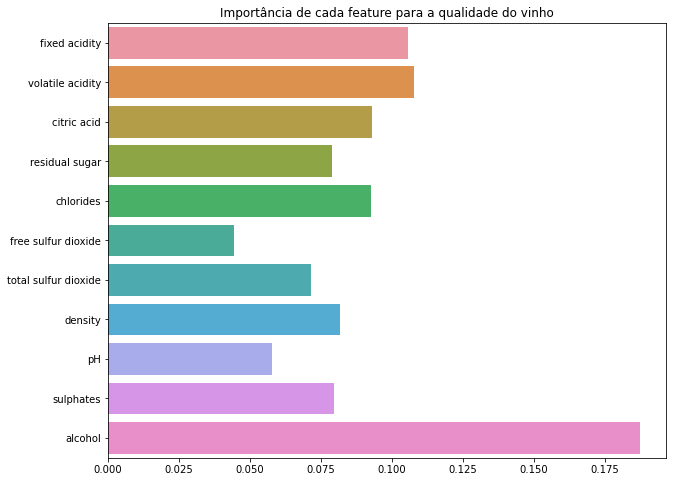

In [21]:
relevancia_features = pd.Series(data = decision_maker.feature_importances_, index = vinho_vars.columns)
plt.figure(figsize = (10, 8))
sns.barplot(x = relevancia_features, y = relevancia_features.index, orient='h').set_title('Importância de cada feature para a qualidade do vinho')
plt.show()

7) Por fim, utilizamos a função "score" tanto para a previsão de treino como para a previsão de teste. Essa função calcula a taxa de acerto do nosso classificador. Além disso, fizemos o processo de Validação Cruzada utilizando 10 ciclos e calculamos a performance média e desvio padrão das duas medidas R2.

In [ ]:
score_de_treino = decision_maker.score(X_treinamento, y_treinamento)
score_de_test = decision_maker.score(X_teste, y_teste)
f'A taxa de acerto do classificador ao analisar a base de treinamento é de {score_de_treino:.4f} e ao analisar a base de teste é de {score_de_test:.4f}, assim como já tinha sido concluido anteriormente'

'A taxa de acerto do classificador ao analisar a base de treinamento é de 1.0000 e ao analisar a base de teste é de 0.5786, assim como já tinha sido concluido anteriormente'

In [ ]:
kfold  = KFold(n_splits=10, shuffle=True)
valores_R2 = cross_val_score(decision_maker, vinho_vars, vinho['quality'], cv = kfold)

for i in valores_R2:
    print("Score do R2 : {0}".format(i))
print("Média dos R2: {0}".format(valores_R2.mean()))
print("Desvio padrão dos R2: {0}".format(valores_R2.std()))


Score do R2 : 0.46956521739130436
Score do R2 : 0.5739130434782609
Score do R2 : 0.5217391304347826
Score do R2 : 0.5175438596491229
Score do R2 : 0.631578947368421
Score do R2 : 0.6929824561403509
Score do R2 : 0.5614035087719298
Score do R2 : 0.5964912280701754
Score do R2 : 0.5877192982456141
Score do R2 : 0.5526315789473685
Média dos R2: 0.570556826849733
Desvio padrão dos R2: 0.05957187824872546


A técnica da árvore de decisão apresenta um desvio padrão alto, próximo de 3.5%, o que indica uma variação que pioraria consideravelmente sua performance, em torno da média de aproximadamente 59%, valor um pouco superior aos 57.64% encontrados quando foi feito o cálculo utilizando a função score.

<h1> Análise do classificador</h1>
O nosso classificador por árvore de decisão apresentou a princípio uma taxa de acerto de 59%, um valor bastante razoável considerando a quantidade de targets e features da nossa base de dados. Porém, podemos ir um pouco mais a fundo e concluir algumas coisas sobre essa taxa de erro. 

É fácil concluir que o nosso modelo de predição não é eficaz para determinar vinhos no qual a qualidade seja muito alta ou muito baixa. Isso ocorre, pois o dataframe base do projeto não possuia muitas amostras de vinhos de qualidade muito baixa, como 3 e 4, e também apresentava poucas informações de vinhos de qualidade muito alta, como qualidade 8. Como consequência disso, a taxa de acerto do nosso classificador para qualidades "extremas" cai muito quando comparado à taxa de acerto para qualidades intermediárias.

Além disso, quando se faz a análise do valor de RMSE (Raiz quadrada do erro-médio), observa-se que o nosso classificador, apesar de errar, costumava errar com valores próximos. Por exemplo, quando o nosso classificador ia definir a qualidade de um vinho que se enquadra como 5, ele acabava por atribuílo a um vinho de qualidade 6, que é próximo, mas é equivocado. Pode-se concluir isso já que o valor do RMSE é aproximadamente 0.86, ou seja, o classificador costuma errar o valor em 0.8. Isso é confirmado quando analisamos o crosstab entre as qualidades reais de cada vinho e as qualidades atribuidas pelo codigo da arvore de decisão.

Por fim, observamos que as 3 colunas mais relevantes na decisão da qualidade do vinho foram em ordem de prioridade: Quantidade de álcool no vinho, Acidez fixa e Quantidade de sulfatos.

Em um último momento, percebemos que o nosso classificador provavelmente se enquadraria na classificação de overfitting. Pode-se afirmar isso uma vez que o classificador aprendeu perfeitamente o padrão dos dados analisados, não cometendo nenhum erro quando necessário fazer a predição dos vinhos da coluna de treinamento, como conclui-se com o valor do RMSE igual a 0, porém, ao que parece, ele não consegue se adaptar muito bem a novas condições, o que acaba ocasionando em erros de previsão, classificando um vinho com uma qualidade incorreta quase 40% das vezes.